### 자전거 거치대 수 대비 대여수 비율

In [1]:
import pandas as pd
import numpy as np

In [2]:
cnt = pd.read_csv("data/자전거대여수_all.csv", encoding='utf-8')
display(cnt.head())
cnt.info() # 총 2083개의 데이터

,대여소번호,대여소명,동,구,총거치대수,2020년_대여수,2019년_대여수
0,1695,월계미륭아파트 정문,월계3동,노원구,10,0,0
1,2301,현대고등학교 건너편,신사동,강남구,10,11352,17117
2,2302,교보타워 버스정류장(신논현역 3번출구 후면),논현1동,강남구,10,4762,12548
3,2303,논현역 7번출구,논현1동,강남구,15,2367,8413
4,2304,신영 ROYAL PALACE 앞,논현2동,강남구,10,931,2631


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   대여소번호      2083 non-null   int64 
 1   대여소명       2083 non-null   object
 2   동          2083 non-null   object
 3   구          2083 non-null   object
 4   총거치대수      2083 non-null   int64 
 5   2020년_대여수  2083 non-null   int64 
 6   2019년_대여수  2083 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 114.0+ KB


In [3]:
cnt1 = cnt.drop(cnt.columns[[0, 1, 3]], axis=1)
cnt1.head()

,동,총거치대수,2020년_대여수,2019년_대여수
0,월계3동,10,0,0
1,신사동,10,11352,17117
2,논현1동,10,4762,12548
3,논현1동,15,2367,8413
4,논현2동,10,931,2631


In [4]:
cnt1['총대여수'] = cnt1[['2020년_대여수', '2019년_대여수']].sum(axis=1)
cnt1 = cnt1.drop(cnt1.columns[[2, 3]], axis=1)
cnt1.fillna(0, inplace=True)
display(cnt1.head())

,동,총거치대수,총대여수
0,월계3동,10,0
1,신사동,10,28469
2,논현1동,10,17310
3,논현1동,15,10780
4,논현2동,10,3562


In [5]:
cnt2 = cnt1.groupby(cnt1['동']).sum()
display(cnt2.sort_values(by=['총대여수'], ascending=False).head(5)) # 총대여수 내림차순 정렬

,총거치대수,총대여수
동,,
여의동,608,621964
가양1동,948,470514
자양3동,147,268024
상암동,419,245503
당산2동,147,239109


In [6]:
cnt2['비율'] = round(cnt2['총대여수'] / cnt2['총거치대수'] * 100, 2)
print('[총 거치대수 대비 총 대여수가 낮은 비율 10개]')
display(cnt2.sort_values(by=['비율']).head(10))
print('[총 거치대수 대비 총 대여수가 높은 비율 10개]')
display(cnt2.sort_values(by=['비율']).tail(10))

[총 거치대수 대비 총 대여수가 낮은 비율 10개]


,총거치대수,총대여수,비율
동,,,
이태원2동,10,0,0.00
청림동,15,0,0.00
창신1동,40,104,260.00
방학2동,20,140,700.00
후암동,10,72,720.00
신사2동,10,82,820.00
독산2동,14,138,985.71
중곡2동,9,94,1044.44
중화1동,8,105,1312.50


[총 거치대수 대비 총 대여수가 높은 비율 10개]


,총거치대수,총대여수,비율
동,,,
신림동,65,131003,201543.08
등촌3동,59,121151,205340.68
우장산동,42,89819,213854.76
자양1동,44,101249,230111.36
풍납1동,15,35171,234473.33
자양2동,24,58477,243654.17
노량진2동,10,26130,261300.00
송파1동,37,98197,265397.30
숭인1동,10,28201,282010.00


In [7]:
cnt3 = cnt2.reset_index()

In [8]:
#dong = cnt3['동']

In [9]:
# dong.to_excel('data/dong_list.xlsx', index=False)

### 생산인구, 경사도, 자전거도로 길이 data와 자전거대여수 data merge

In [10]:
df = pd.read_csv("data/df_HDong.csv", encoding='utf-8')
df.info() # 총 423개의 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  423 non-null    int64  
 1   HDong_name  423 non-null    object 
 2   workppl     423 non-null    float64
 3   dem         423 non-null    float64
 4   bikelength  423 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.6+ KB


In [11]:
display(df.head(5))

,Unnamed: 0,HDong_name,workppl,dem,bikelength
0,1,가락1동,22381.0,-15.5247,7150.0
1,2,가락2동,18686.0,-39.3115,4704.0
2,3,가락본동,25532.0,-30.7845,6932.0
3,4,가리봉동,7566.0,-21.8088,0.0
4,5,가산동,25926.0,-12.9490,2108.0


In [12]:
df = df.drop(df.columns[[0]], axis=1)

In [13]:
display(df.head())

,HDong_name,workppl,dem,bikelength
0,가락1동,22381.0,-15.5247,7150.0
1,가락2동,18686.0,-39.3115,4704.0
2,가락본동,25532.0,-30.7845,6932.0
3,가리봉동,7566.0,-21.8088,0.0
4,가산동,25926.0,-12.9490,2108.0


In [14]:
df.columns=['동', '생산인구', '경사도', '자전거도로길이']

In [15]:
display(df.head())

,동,생산인구,경사도,자전거도로길이
0,가락1동,22381.0,-15.5247,7150.0
1,가락2동,18686.0,-39.3115,4704.0
2,가락본동,25532.0,-30.7845,6932.0
3,가리봉동,7566.0,-21.8088,0.0
4,가산동,25926.0,-12.9490,2108.0


In [16]:
display(cnt3.head())

,동,총거치대수,총대여수,비율
0,가락1동,115,74652,64914.78
1,가락2동,45,33583,74628.89
2,가락본동,55,25487,46340.00
3,가리봉동,10,5621,56210.00
4,가산동,258,160033,62028.29


In [17]:
all = pd.merge(df, cnt3, on='동', how='outer')
display(all.head())

,동,생산인구,경사도,자전거도로길이,총거치대수,총대여수,비율
0,가락1동,22381.0,-15.5247,7150.0,115.0,74652.0,64914.78
1,가락2동,18686.0,-39.3115,4704.0,45.0,33583.0,74628.89
2,가락본동,25532.0,-30.7845,6932.0,55.0,25487.0,46340.00
3,가리봉동,7566.0,-21.8088,0.0,10.0,5621.0,56210.00
4,가산동,25926.0,-12.9490,2108.0,258.0,160033.0,62028.29


In [18]:
all[all['동'].isnull()] # 동이 null인 것은 없음
all[all['생산인구'].isnull()] # 성희가 조사한 동-내가 정리한 동 Null값 없음
all[all['총거치대수'].isnull()] # 동이름 있는데 거치대 수가 없는 즉, 자전거대여소가 없는 동

,동,생산인구,경사도,자전거도로길이,총거치대수,총대여수,비율
19,거여2동,10255.0,-47.0949,0.0,NaN,NaN,NaN
46,길음2동,11108.0,-32.1931,686.0,NaN,NaN,NaN
53,남현동,11469.0,-128.3537,4023.0,NaN,NaN,NaN
66,대림1동,11664.0,-17.9474,1935.0,NaN,NaN,NaN
90,둔촌1동,2702.0,-31.4826,0.0,NaN,NaN,NaN
126,반포3동,17822.0,-10.9822,1362.0,NaN,NaN,NaN
159,사당4동,14471.0,-28.3723,0.0,NaN,NaN,NaN
180,상도3동,21312.0,-54.3228,0.0,NaN,NaN,NaN
207,성현동,16202.0,-93.6938,0.0,NaN,NaN,NaN
227,시흥5동,8507.0,-111.3490,0.0,NaN,NaN,NaN


#### 19. 거여2동 --> 거여1동에 위치 *
#### 46. 길음2동 --> 길음1동, 월곡1동 위치 *
#### 53. 남현동 --> 관악산이 위치한 역
#### 66. 대림1동 --> 대림2동 위치 *
#### 90. 둔촌1동 --> 바로 옆 올림픽공원 주변으로 대여소 위치
#### 126. 반포3동 --> 잠원동 위치 *
#### 159. 사당4동 --> 사당3동 위치 *
#### 180. 상도3동 --> 대방동 위치 *
#### 207. 성현동 --> 은천동 위치 *
#### 227. 시흥5동 --> 시흥1동 위치 *
#### 230. 신길4동 --> 신길3동 위치 * 
#### 246. 신원동 --> 서림동 위치 *
#### 282. 염리동 --> 아현동, 대흥동 위치 *
#### 295. 용문동 --> 효창동 위치 *
#### 340. 장위2동 --> 월곡동 위치 *
#### 375. 창신2동 --> 종로5.6가동 위치 *
#### 404. 홍제1동 --> 홍제2동 위치 *
#### 408. 화곡2동 --> 화곡 8동 위치 *

#### 56. 노량진2동 --> 변경
#### 162. 삼각산동 --> 변경
#### 167. 삼양동 --> 변경
#### 170. 상계10동 --> 변경
#### 176. 상계8동 --> 변경
#### 221. 숭인1동 --> 변경
#### 231. 신길5동 --> 변경
#### 252. 신월6동 --> 변경
#### 265. 아현동 --> 변경
#### 283. 염창동 --> 변경

In [19]:
all.fillna(0, inplace=True) # 결측값 0으로 치환

In [20]:
all.to_csv('data/dong_df_1110.csv', index=False, encoding='utf-8')

In [21]:
display(all.head(10))

,동,생산인구,경사도,자전거도로길이,총거치대수,총대여수,비율
0,가락1동,22381.0,-15.5247,7150.0,115.0,74652.0,64914.78
1,가락2동,18686.0,-39.3115,4704.0,45.0,33583.0,74628.89
2,가락본동,25532.0,-30.7845,6932.0,55.0,25487.0,46340.00
3,가리봉동,7566.0,-21.8088,0.0,10.0,5621.0,56210.00
4,가산동,25926.0,-12.9490,2108.0,258.0,160033.0,62028.29
5,가양1동,29687.0,-8.2590,19044.0,948.0,470514.0,49632.28
6,가양2동,6812.0,-6.3928,5339.0,65.0,62588.0,96289.23
7,가양3동,4354.0,-10.0878,776.0,33.0,48481.0,146912.12
8,가회동,1729.0,-59.9773,0.0,33.0,19088.0,57842.42
9,갈현1동,24001.0,-65.7546,0.0,15.0,11612.0,77413.33


### 데이터 표준화

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [23]:
data = all.set_index('동')
display(data.head())

,생산인구,경사도,자전거도로길이,총거치대수,총대여수,비율
동,,,,,,
가락1동,22381.0,-15.5247,7150.0,115.0,74652.0,64914.78
가락2동,18686.0,-39.3115,4704.0,45.0,33583.0,74628.89
가락본동,25532.0,-30.7845,6932.0,55.0,25487.0,46340.00
가리봉동,7566.0,-21.8088,0.0,10.0,5621.0,56210.00
가산동,25926.0,-12.9490,2108.0,258.0,160033.0,62028.29


In [24]:
zscore = (data - data.mean(axis=0)) / data.std(axis=0)
display(zscore.head())

,생산인구,경사도,자전거도로길이,총거치대수,총대여수,비율
동,,,,,,
가락1동,0.805473,0.674284,1.051002,0.689735,0.527125,-0.156425
가락2동,0.286642,0.071430,0.436598,-0.258851,-0.221716,0.029002
가락본동,1.247918,0.287539,0.996243,-0.123339,-0.369337,-0.510988
가리봉동,-1.274766,0.515020,-0.744987,-0.733144,-0.731568,-0.322585
가산동,1.303241,0.739563,-0.215484,2.627560,2.083939,-0.211523


In [25]:
# check of 'mean=0'
zscore.mean(axis=0)

생산인구      -9.711171e-17
경사도       -7.123931e-16
자전거도로길이   -3.628566e-17
총거치대수      8.503836e-17
총대여수      -5.908722e-17
비율         8.635068e-16
dtype: float64

In [26]:
# check of 'standard deviation=1'
zscore.std(axis=0)

생산인구       1.0
경사도        1.0
자전거도로길이    1.0
총거치대수      1.0
총대여수       1.0
비율         1.0
dtype: float64

In [27]:
x_min = zscore.min()
x_max = zscore.max()
x_len = len(zscore)

print(x_min)
print(x_max)
print(x_len)

생산인구      -2.296280
경사도       -6.100637
자전거도로길이   -0.744987
총거치대수     -0.868656
총대여수      -0.834060
비율        -1.395546
dtype: float64
생산인구        3.302742
경사도         0.905724
자전거도로길이     7.957146
총거치대수      11.977904
총대여수       10.506665
비율          5.530881
dtype: float64
423


In [16]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib
font_path = "data/210 M고딕040.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
print(plt.rcParams['font.family'])
matplotlib.font_manager._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

['210 MGothic']


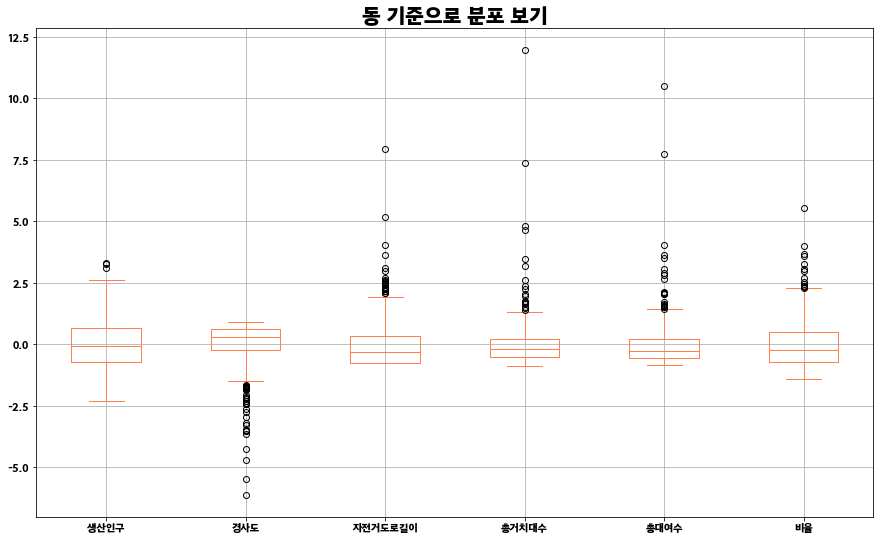

In [29]:
# Box Plot
zscore[['생산인구', '경사도','자전거도로길이', '총거치대수', '총대여수', '비율']].plot(
    kind='box',
    figsize=(15, 9),
    color='coral').set_title('동 기준으로 분포 보기', fontsize=20)  
plt.rc('font', size = 15)
plt.grid()
plt.show()

### 상관관계 측정 (비율 칼럼 제거)

In [30]:
data_corr = data.drop(data.columns[[5]], axis=1, inplace = True)

In [31]:
data.corr(method='pearson')

,생산인구,경사도,자전거도로길이,총거치대수,총대여수
생산인구,1.000000,0.115075,0.290951,0.274913,0.257467
경사도,0.115075,1.000000,0.284632,0.091947,0.233484
자전거도로길이,0.290951,0.284632,1.000000,0.457922,0.500293
총거치대수,0.274913,0.091947,0.457922,1.000000,0.800050
총대여수,0.257467,0.233484,0.500293,0.800050,1.000000


Text(0.5, 1.0, '동 기준 변수들의 상관관계 시각화')

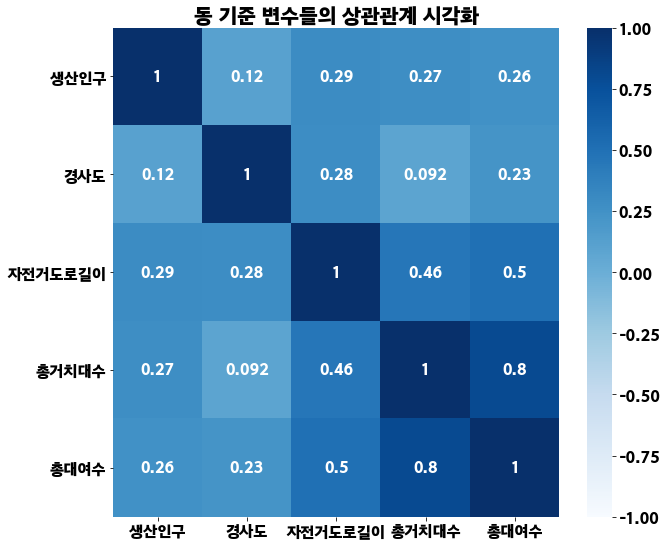

In [46]:
#heatmap으로 상관관계를 표시

plt.rcParams["figure.figsize"] = (5,5)
plt.figure(figsize=(10, 9))
plt.rc('font', size = 15)
sns.heatmap(data.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Blues', #색상
           vmin = -1 #컬러차트 영역 -1 
           ).set_title('동 기준 변수들의 상관관계 시각화', fontsize=20)  

<AxesSubplot:>

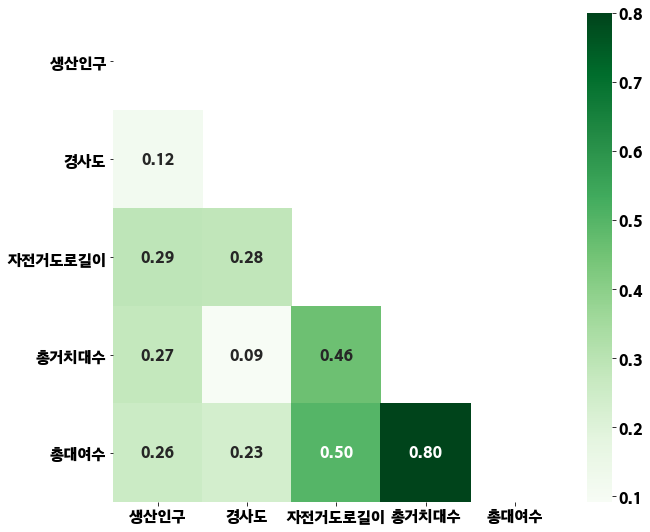

In [47]:
plt.figure(figsize=(10, 9))
plt.rc('font', size = 15)

mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (10,6) # 그림 크기 조정
sns.heatmap(data = data.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Greens')

### 다중회귀분석

In [7]:
last = pd.read_excel("data/last_자전거이용비율수정.xlsx")
display(last.head())
last.info() 

,Unnamed: 0,동,경사도,자전거도로길이,총거치대수,총대여수,비율,인구,면적,인구밀도,지하철역개수,버스정거장개수,접근성,교통편,자전거이용비율
0,0,가락1동,-15.5247,7150,115.0,74652.0,64914.78,27716,1.34,20684,1,13,12.686567,17,2.693462
1,1,가락2동,-39.3115,4704,45.0,33583.0,74628.89,33920,0.96,35333,0,23,23.958333,23,0.990065
2,2,가락본동,-30.7845,6932,55.0,25487.0,46340.00,27876,1.13,24669,2,25,29.203540,33,0.914299
3,3,가리봉동,-21.8088,0,10.0,5621.0,56210.00,15250,0.40,38125,0,9,22.500000,9,0.368590
4,4,가산동,-12.9490,2108,258.0,160033.0,62028.29,24455,2.52,9704,2,111,47.222222,119,6.543979


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  424 non-null    int64  
 1   동           424 non-null    object 
 2   경사도         424 non-null    float64
 3   자전거도로길이     424 non-null    int64  
 4   총거치대수       406 non-null    float64
 5   총대여수        406 non-null    float64
 6   비율          406 non-null    float64
 7   인구          424 non-null    int64  
 8   면적          424 non-null    float64
 9   인구밀도        424 non-null    int64  
 10  지하철역개수      424 non-null    int64  
 11  버스정거장개수     424 non-null    int64  
 12  접근성         424 non-null    float64
 13  교통편         424 non-null    int64  
 14  자전거이용비율     406 non-null    float64
dtypes: float64(7), int64(7), object(1)
memory usage: 49.8+ KB


In [49]:
# last['자전거이용비율'] = last['자전거이용비율']*100
# display(last)

In [9]:
last.fillna(0, inplace=True) # 결측값 0으로 치환

In [10]:
last = last.drop(last.columns[[0, 6, 9, 13, 14]], axis=1) # unnamed:0 칼럼 지우기

In [ ]:
last = last.drop(last.colums[[]]

In [11]:
last = last.set_index('동')

In [12]:
last.head()

,경사도,자전거도로길이,총거치대수,총대여수,인구,면적,지하철역개수,버스정거장개수,접근성
동,,,,,,,,,
가락1동,-15.5247,7150,115.0,74652.0,27716,1.34,1,13,12.686567
가락2동,-39.3115,4704,45.0,33583.0,33920,0.96,0,23,23.958333
가락본동,-30.7845,6932,55.0,25487.0,27876,1.13,2,25,29.203540
가리봉동,-21.8088,0,10.0,5621.0,15250,0.40,0,9,22.500000
가산동,-12.9490,2108,258.0,160033.0,24455,2.52,2,111,47.222222


In [39]:
z = (last - last.mean(axis=0)) / last.std(axis=0)
display(z.head())

,경사도,자전거도로길이,총거치대수,총대여수,인구,면적,지하철역개수,버스정거장개수,접근성
동,,,,,,,,,
가락1동,0.673106,1.050335,0.687846,0.520405,0.439995,-0.055353,0.368904,-0.883370,-1.034388
가락2동,0.069869,0.435476,-0.260995,-0.225681,1.104941,-0.295356,-0.882418,-0.224301,-0.230132
가락본동,0.286115,0.995536,-0.125447,-0.372759,0.457144,-0.187987,1.620225,-0.092487,0.144120
가리봉동,0.513740,-0.746984,-0.735416,-0.733658,-0.896113,-0.649045,-0.882418,-1.146997,-0.334186
가산동,0.738426,-0.217089,2.626195,2.071492,0.090481,0.689919,1.620225,5.575505,1.429777


In [14]:
z.corr(method='pearson')

,경사도,자전거도로길이,총거치대수,총대여수,인구,면적,지하철역개수,버스정거장개수,접근성
경사도,1.000000,0.285335,0.093226,0.235479,0.040014,-0.402123,0.099728,-0.144388,0.197274
자전거도로길이,0.285335,1.000000,0.458573,0.500572,0.231002,0.314112,0.225671,0.193258,-0.260147
총거치대수,0.093226,0.458573,1.000000,0.799643,0.275500,0.436106,0.426678,0.490572,-0.098606
총대여수,0.235479,0.500572,0.799643,1.000000,0.248566,0.281044,0.428177,0.356758,-0.035492
인구,0.040014,0.231002,0.275500,0.248566,1.000000,0.281298,0.094095,0.503398,-0.026490
면적,-0.402123,0.314112,0.436106,0.281044,0.281298,1.000000,0.226941,0.534703,-0.432942
지하철역개수,0.099728,0.225671,0.426678,0.428177,0.094095,0.226941,1.000000,0.223122,0.067905
버스정거장개수,-0.144388,0.193258,0.490572,0.356758,0.503398,0.534703,0.223122,1.000000,0.221832
접근성,0.197274,-0.260147,-0.098606,-0.035492,-0.026490,-0.432942,0.067905,0.221832,1.000000


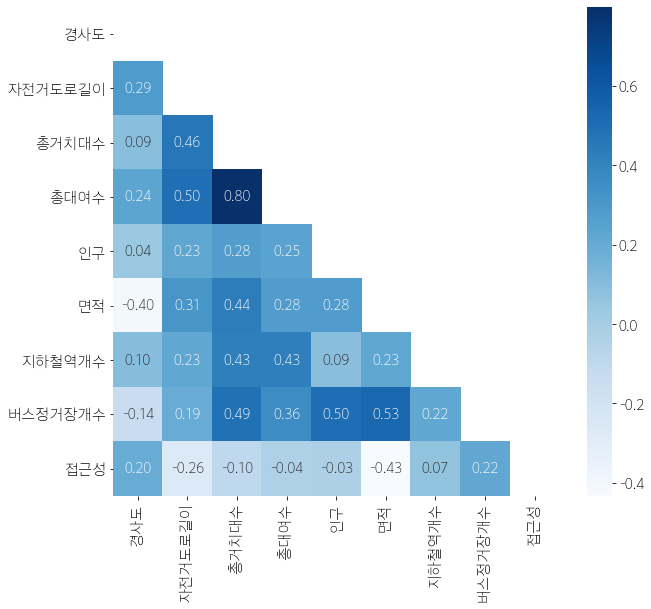

In [37]:
plt.figure(figsize=(10, 9))
plt.rc('font', size = 15)

mask = np.zeros_like(z.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (15,15) # 그림 크기 조정
sns.heatmap(data = z.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Blues')
plt.show()

### 다중회귀분석 - 다중선형회귀

In [40]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

x = last[['경사도', '총대여수', '면적', '자전거도로길이', '지하철역개수', '인구']]
target = last[['총거치대수']]

# 회귀분석을 위해 for b0, 상수항 추가
x1 = sm.add_constant(x, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x1)
# 회귀모델 적합
fitted_multi_model = multi_model.fit()
# 결과 서머리
fitted_multi_model.summary()
# 다중공선성, 오차항의 정규성, 등분산성 등의 기본가정의 문제가 위배된 경우를 처리하여 분석해주지 않는다. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  총거치대수   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     157.5
Date:                Fri, 13 Nov 2020   Prob (F-statistic):          6.93e-104
Time:                        17:09:04   Log-Likelihood:                -2173.8
No. Observations:                 424   AIC:                             4362.
Df Residuals:                     417   BIC:                             4390.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5949      6.381     -0.720      0.472     -17.137       7.947
경사도           -0.0020      0.065     -0.030      0.976      -0.130       0.126
총대여수           0.0009   4.66e-05     19.801      0.000       0.001       0.001
면적             9.6922      1.694      5.720      0.000       6.362      13.023
자전거도로길이        0.0004      0.001      0.699      0.485      -0.001       0.002
지하철역개수         7.0367      2.802      2.512      0.012       1.530      12.544
인구             0.0003      0.000      1.145      0.253      -0.000       0.001
==============================================================================
Omnibus:                      383.034   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21054.317
Skew:                           3.528   Prob(JB):                         0.00
Kurtosis:                      36.793   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# 회귀계수
print(fitted_multi_model.params)

const     -4.594885
경사도       -0.001950
총대여수       0.000923
면적         9.692205
자전거도로길이    0.000445
지하철역개수     7.036737
인구         0.000262
dtype: float64


In [33]:
# 행렬 연산을 통해 beta구하기
# (X'X)^(-1)*X'Y
#행렬의 역행렬을 구하기 위한 라이브러리
from numpy import linalg                      

ba = linalg.inv(np.dot(x1.T, x1))   #inverse matrix in python
np.dot(np.dot(ba, x1.T),target)

# 위에 다중선형회귀모델의 회귀계수와 정확히 일치하는 것을 확인가능.
# analytic한 솔루션 = 식이 존재해서 그식을 한 번에 풀 수 있는 방식이 존재
# 행렬연산 다중회귀분석

array([[-4.59488511e+00],
       [-1.95003225e-03],
       [ 9.22784520e-04],
       [ 9.69220525e+00],
       [ 4.45280495e-04],
       [ 7.03673735e+00],
       [ 2.62238736e-04]])

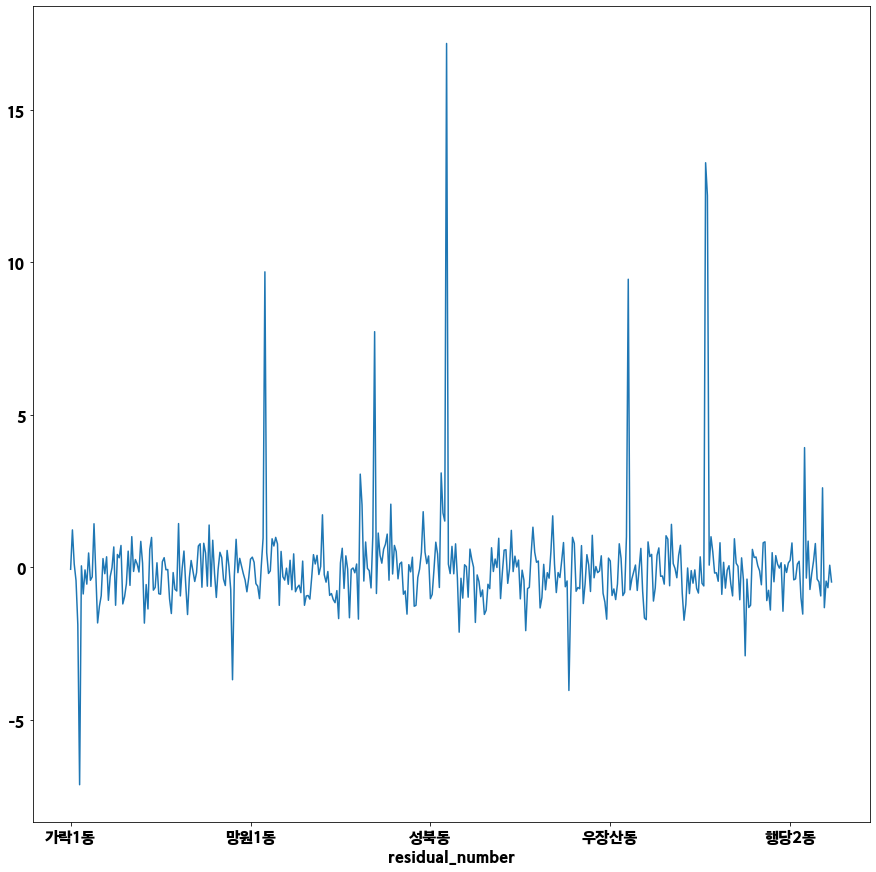

In [63]:
# y_hat 구하기
pred4 = fitted_multi_model.predict(x1)

# residual plot 구하기

fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

### 다중공선성 확인 방법 3가지

### (1) 결정계수(R^2)와 유의확률(p-value)을 활용한 다중공선성 확인 
### (2) 상관계수 및 산점도를 통한 다중공선성 확인
### (3) VIF를 통한 다중공선성 확인

In [34]:
x2 = last[['경사도', '자전거도로길이', '총거치대수', '인구', '면적', '지하철역개수']]
target = last[['총대여수']]
x2.head()

,경사도,자전거도로길이,총거치대수,인구,면적,지하철역개수
동,,,,,,
가락1동,-15.5247,7150,115.0,27716,1.34,1
가락2동,-39.3115,4704,45.0,33920,0.96,0
가락본동,-30.7845,6932,55.0,27876,1.13,2
가리봉동,-21.8088,0,10.0,15250,0.40,0
가산동,-12.9490,2108,258.0,24455,2.52,2


In [35]:
x2 = sm.add_constant(x2, has_constant = "add")

# 회귀모델 적합
multi_model2 = sm.OLS(target, x2)
fitted_multi_model2 = multi_model2.fit()

# 결과 출력
fitted_multi_model2.summary() # R스퀘어값: 66.6%, P-value: 가장 높은 교통편, 지하철역개수, 버스정거장개수, 경사도 순으로 제거한다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총대여수   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     152.6
Date:                Fri, 13 Nov 2020   Prob (F-statistic):          6.62e-102
Time:                        16:37:40   Log-Likelihood:                -4983.2
No. Observations:                 424   AIC:                             9980.
Df Residuals:                     417   BIC:                         1.001e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6515.6807   4805.840      1.356      0.176   -2931.011     1.6e+04
경사도          129.5812     48.708      2.660      0.008      33.838     225.324
자전거도로길이        1.9774      0.471      4.198      0.000       1.051       2.903
총거치대수        525.1442     26.521     19.801      0.000     473.012     577.276
인구             0.1562      0.173      0.903      0.367      -0.184       0.496
면적         -2196.9237   1323.011     -1.661      0.098   -4797.526     403.679
지하철역개수      6765.2511   2103.495      3.216      0.001    2630.476    1.09e+04
==============================================================================
Omnibus:                      200.999   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3245.118
Skew:                           1.600   Prob(JB):                         0.00
Kurtosis:                      16.170   Cond. No.                     8.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
### p-value가 높은 교통편, 버스정거장, 지하철역 개수 제거

In [45]:
x3 = last[['경사도', '자전거도로길이', '총거치대수', '인구', '면적', '지하철역개수']]
target = last[['총대여수']]

x3 = sm.add_constant(x3, has_constant = "add")

# 회귀모델 적합
multi_model2 = sm.OLS(target, x3)
fitted_multi_model2 = multi_model2.fit()

# 결과 출력
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총대여수   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     152.6
Date:                Fri, 13 Nov 2020   Prob (F-statistic):          6.62e-102
Time:                        17:13:53   Log-Likelihood:                -4983.2
No. Observations:                 424   AIC:                             9980.
Df Residuals:                     417   BIC:                         1.001e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6515.6807   4805.840      1.356      0.176   -2931.011     1.6e+04
경사도          129.5812     48.708      2.660      0.008      33.838     225.324
자전거도로길이        1.9774      0.471      4.198      0.000       1.051       2.903
총거치대수        525.1442     26.521     19.801      0.000     473.012     577.276
인구             0.1562      0.173      0.903      0.367      -0.184       0.496
면적         -2196.9237   1323.011     -1.661      0.098   -4797.526     403.679
지하철역개수      6765.2511   2103.495      3.216      0.001    2630.476    1.09e+04
==============================================================================
Omnibus:                      200.999   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3245.118
Skew:                           1.600   Prob(JB):                         0.00
Kurtosis:                      16.170   Cond. No.                     8.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 상관계수 및 산점도를 통한 다중공선성 확인

In [43]:
z = z.drop(z.columns[[7, 8]], axis=1)
display(z)

,경사도,자전거도로길이,총거치대수,총대여수,인구,면적,지하철역개수
동,,,,,,,
가락1동,0.673106,1.050335,0.687846,0.520405,0.439995,-0.055353,0.368904
가락2동,0.069869,0.435476,-0.260995,-0.225681,1.104941,-0.295356,-0.882418
가락본동,0.286115,0.995536,-0.125447,-0.372759,0.457144,-0.187987,1.620225
가리봉동,0.513740,-0.746984,-0.735416,-0.733658,-0.896113,-0.649045,-0.882418
가산동,0.738426,-0.217089,2.626195,2.071492,0.090481,0.689919,1.620225
...,...,...,...,...,...,...,...
효창동,0.069922,-0.746984,-0.396544,-0.496074,-1.426655,-0.623782,0.368904
후암동,-1.727465,-0.746984,-0.735416,-0.834464,-0.553672,-0.358515,-0.882418
휘경1동,0.666328,-0.272140,-0.464319,-0.077260,-0.761281,-0.503780,0.368904


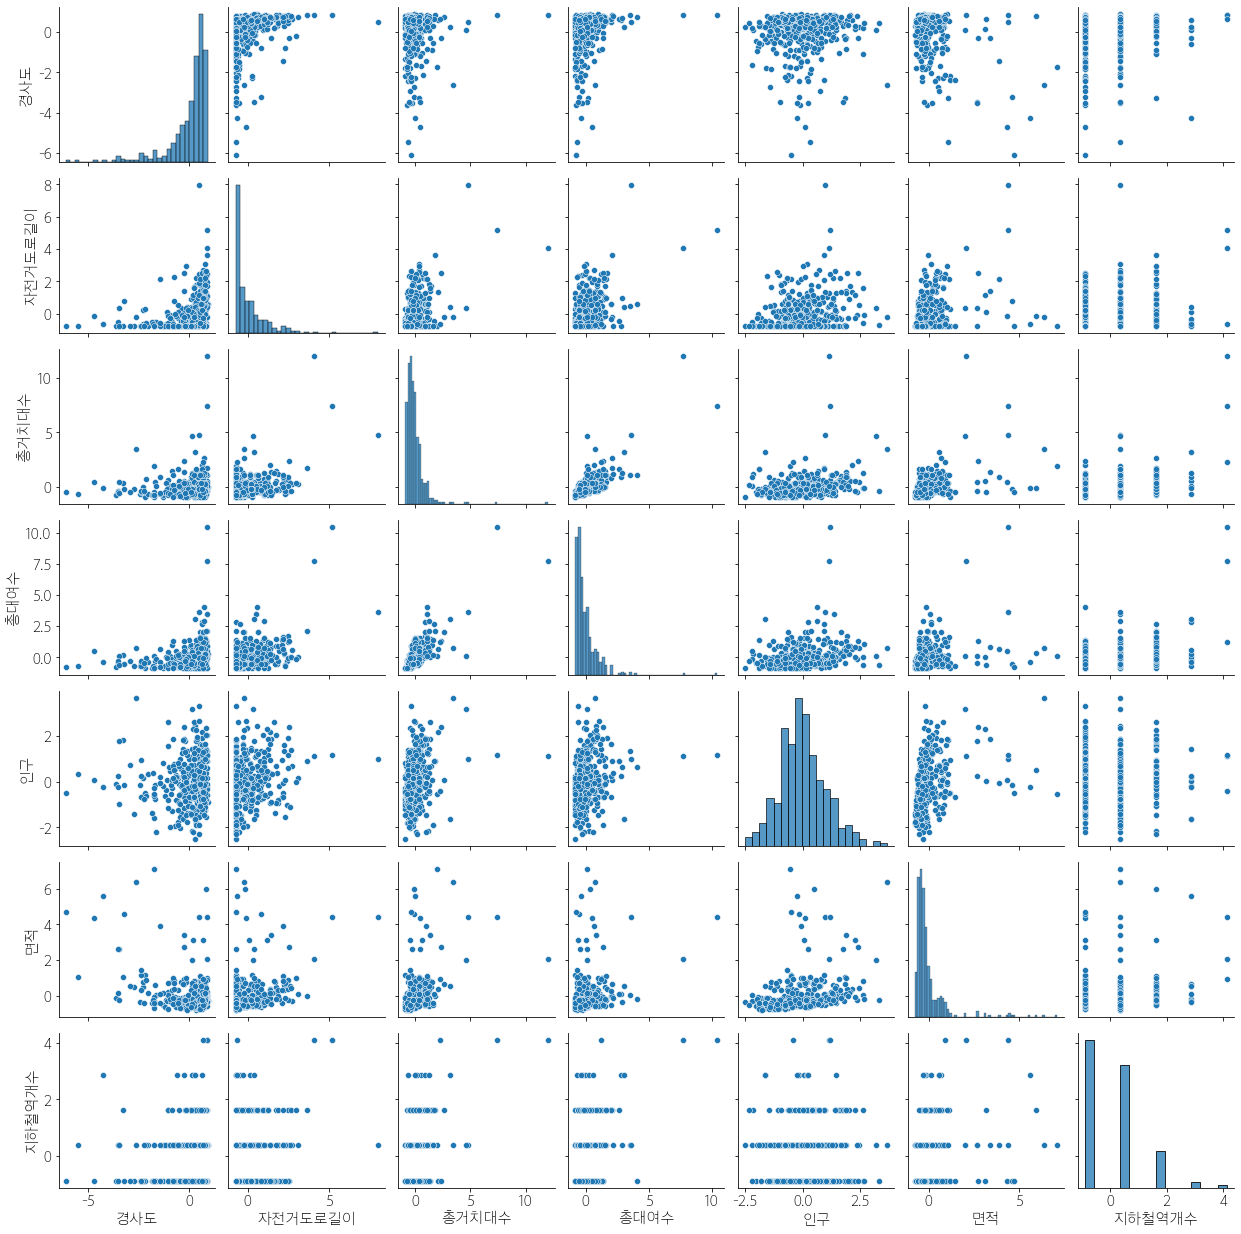

In [44]:
sns.pairplot(z)
plt.savefig("data/corr1.png")
plt.show()

### (3) VIF를 통한 다중공선성 확인

In [87]:
# VIF는 variance inflation factor의 줄임말로, 다중공선성을 확인할 때 쓰는 지표 중 하나다. 
# variance inflation factor는 말그대로 "분산팽창요인"이다. 
# 보통은 VIF가 10보다 크면 다중공선성이 있다고 판단한다. 하지만, 다른 과정을 함께 거쳐주는 것이 다중공선성 문제 확인의 신뢰성을 높인다.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
# 10이상의 VIF factor는 VIF가 10보다 크면 다중공선성이 있다고 판단
# inf의 지하철역개수, 버스정거장개수, 교통편 하나씩 제거.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif["features"] = x2.columns
vif

,VIF Factor,features
0,10.181216,const
1,1.622285,경사도
2,1.544248,자전거도로길이
3,1.683584,총거치대수
4,1.145063,인구
5,1.929729,면적
6,1.242742,지하철역개수


In [98]:
# 지하철역개수, 버스정거장개수 변수 제거 후 vif 확인
# 확연하게 줄어든 교통편의 VIF를 확인할 수 있다.
vif = pd.DataFrame()
x4 = x.drop(x2[["지하철역개수", "버스정거장개수"]], axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x4.values, i) for i in range(x4.shape[1])]
vif["features"] = x4.columns
vif

,VIF Factor,features
0,21.503458,const
1,1.698448,경사도
2,1.730518,자전거도로길이
3,5.025810,총거치대수
4,5.190630,총대여수
5,1.872993,비율
6,3.255766,인구
7,3.193622,면적
8,4.615317,인구밀도
9,4.647115,접근성


In [143]:
# 이제 변수를 제거한 회귀모델을 적합하고 OLS를 확인한다.

x_1 = last[['경사도', '자전거도로길이', '총대여수', '인구', '면적', '인구밀도']]
target = last[['자전거이용비율']]
x_2 = sm.add_constant(x_1, has_constant = "add")

model_vif = sm.OLS(target, x_2)
fitted_model_vif = model_vif.fit()

fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                자전거이용비율   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     112.9
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           4.64e-92
Time:                        15:10:55   Log-Likelihood:                -834.67
No. Observations:                 424   AIC:                             1685.
Df Residuals:                     416   BIC:                             1718.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0793      0.366     11.144      0.000       3.360       4.799
경사도            0.0047      0.003      1.676      0.094      -0.001       0.010
자전거도로길이    -8.499e-05    2.8e-05     -3.037      0.003      -0.000      -3e-05
총대여수        4.176e-05   1.91e-06     21.894      0.000     3.8e-05    4.55e-05
인구         -9.767e-05   1.12e-05     -8.719      0.000      -0.000   -7.57e-05
면적            -0.1196      0.084     -1.428      0.154      -0.284       0.045
인구밀도       -6.196e-05   1.07e-05     -5.765      0.000   -8.31e-05   -4.08e-05
접근성            0.0224      0.008      2.980      0.003       0.008       0.037
==============================================================================
Omnibus:                      489.660   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33568.740
Skew:                           5.297   Prob(JB):                         0.00
Kurtosis:                      45.283   Cond. No.                     3.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
# 10이상의 VIF factor는 VIF가 10보다 크면 다중공선성이 있다고 판단
# inf의 지하철역개수, 버스정거장개수, 교통편 하나씩 제거.
x_3 = last[['자전거도로길이', '총거치대수', '총대여수', '비율', '인구', '면적', '접근성']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_3.values, i) for i in range(x_3.shape[1])]
vif["features"] = x_3.columns
vif

,VIF Factor,features
0,2.276224,자전거도로길이
1,8.128250,총거치대수
2,8.285720,총대여수
3,4.701909,비율
4,6.682908,인구
5,2.671696,면적
6,3.998737,접근성


(296, 13) (128, 13) (296, 1) (128, 1)


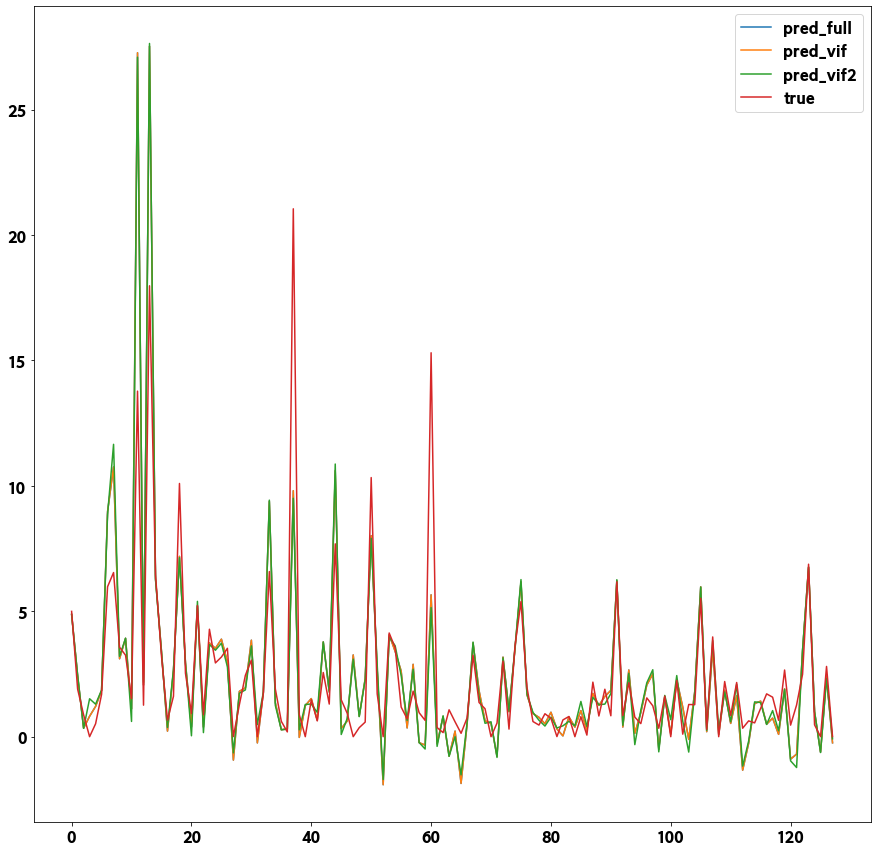

In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x2 = last[['경사도', '자전거도로길이', '총거치대수', '총대여수', '비율', '인구', '면적', '인구밀도', 
       '지하철역개수', '버스정거장개수', '접근성', '교통편']]
x2_ = sm.add_constant(x2, has_constant = "add")
target = last[['자전거이용비율']]


X = x2_
y = target

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)

# 학습데이터와 검증데이터를 7:3으로 분리한다.
# random_state고정을 통해 그때마다 똑같은 값을 분류하도록 한다.
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

fit_train1 = sm.OLS(train_y,train_x)
fit_train1 = fit_train1.fit()

# x3: 버스정류장수 제거
x3 = last[['경사도', '자전거도로길이', '총거치대수', '총대여수', '비율', '인구', '면적', '인구밀도', 
       '접근성', '교통편', '버스정거장개수']]
x3_ = sm.add_constant(x3, has_constant = "add")

X = x3_
y = target
train_x2,test_x2,train_y2,test_y2 = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=1)

# x4: 지하철역, 버스정류장수, 인구밀도 제거
x4 = last[['경사도', '자전거도로길이', '총거치대수', '총대여수', '비율', '인구', '면적', '접근성', '교통편']]
x4_ = sm.add_constant(x4, has_constant = "add")

X = x4_
y = target
train_x3,test_x3,train_y3,test_y3 = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=1)

# x_data3/x_data4의 회귀모델 적합 (fit_train2,fit_train3)

fit_train2 = sm.OLS(train_y2,train_x2)
fit_train2 = fit_train2.fit()

fit_train3 = sm.OLS(train_y3,train_x3)
fit_train3 = fit_train3.fit()

# vif를 통해 NOX를 지운 데이터 x_data3 , NOX,RM을 지운 데이터 x_data4 full모델 실제값 비교

plt.plot(np.array(fit_train1.predict(test_x)),label = "pred_full")
plt.plot(np.array(fit_train2.predict(test_x2)),label = "pred_vif")
plt.plot(np.array(fit_train3.predict(test_x3)),label = "pred_vif2")
plt.plot(np.array(test_y2), label = "true")
plt.legend()
plt.show()


In [135]:
from sklearn.metrics import mean_squared_error

#변수 제거가 이루어지지 않은 full모델 --> 4.893534221435415

mse1 = mean_squared_error(y_true = test_y["자전거이용비율"], y_pred = fit_train1.predict(test_x))

# 지하철 제거 --> 4.893534221434422
mse2 = mean_squared_error(y_true = test_y["자전거이용비율"], y_pred = fit_train2.predict(test_x2))

# 지하철, 버스, 인구밀도를 제거한 모델 --> 5.122615316542674
mse3 = mean_squared_error(y_true = test_y["자전거이용비율"], y_pred = fit_train3.predict(test_x3))

print(mse1)
print(mse2)
print(mse3)

4.893534221435415
4.893534221434422
5.122615316542674


### 변수선택법
### 회귀분석을 할 때 다중공선성이 발생하면, 데이터 분석의 신뢰성이나 예측 정확도를 떨어뜨린다. 
### 이러한 문제를 하기 위한 방법 중 하나로 데이터 선정/전처리 과정에서 "변수선택"이 매우 중요하다. 

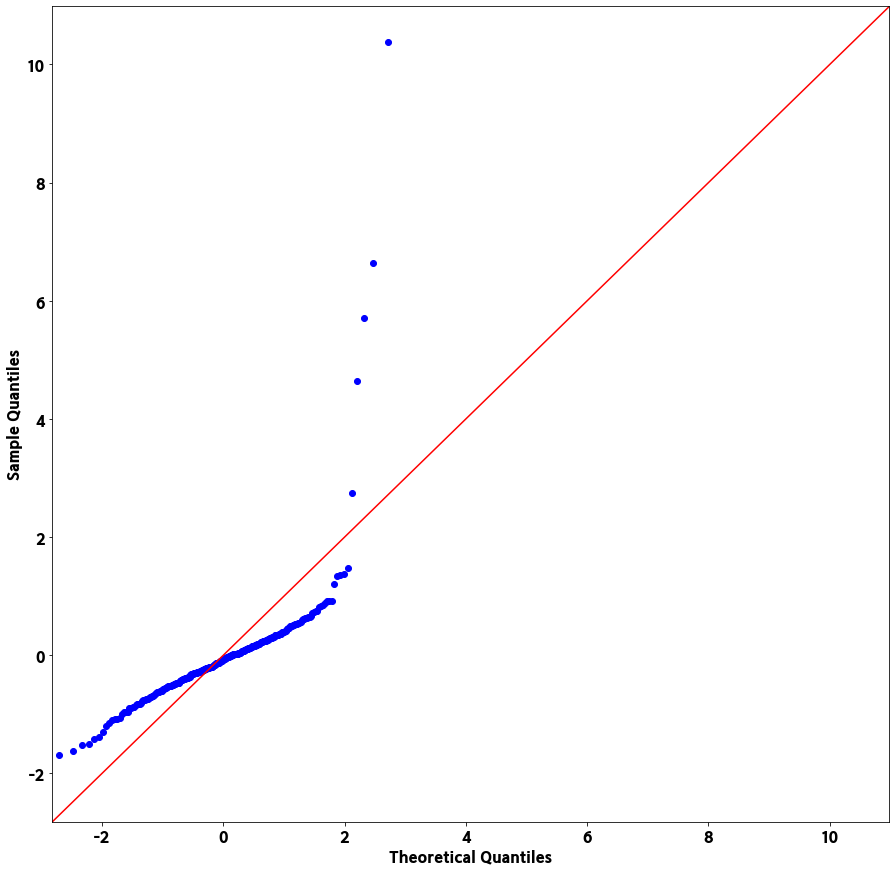

In [139]:
# 학습데이터의 잔차 확인

res = fit_train2.resid

# q-q plot을 통한 잔차의 정규분포 확인
fig = sm.qqplot(res, fit = True, line = '45') # 정규성을 띄고 있다고 보기 어렵다.

In [140]:
# 1. 전진선택법(Forward Selection)
# 2. 후진소거법(Backward Elimination)
# 3. 단계적선택법(Stepwise Selection)